<a href="https://colab.research.google.com/github/Dominik-Lamcha/Optimization_algorithms/blob/main/Particle_Swarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lib import**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import arange
from numpy import meshgrid
import sympy as smp
import scipy
from scipy.misc import derivative
import datetime
from statistics import mean
import atexit
import time
from time import clock
import random

**Function definitions**

In [ ]:
def rastrigin(*X):
    A = 10
    n=len(X)
    return A*n + sum([(x*x - A * np.cos(2 * math.pi * x)) for x in X])
def sphere(*X):
    return sum([(x*x) for x in X])
def rosenbrock(*X):
   sum=0
   n=len(X)
   for i in range(n-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum

In [ ]:
def Rastrigin(X):
    A = 10
    return A*len(X) + sum([(x*x - A * math.cos(2 * math.pi * x)) for x in X])

def Sphere(X):
    return sum([(x*x) for x in X])

def Rosenbrock(X):
   sum=0
   for i in range(len(X)-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum

PSO found best solution at f([2.71702471 2.15852092])=0.9400583724804715
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


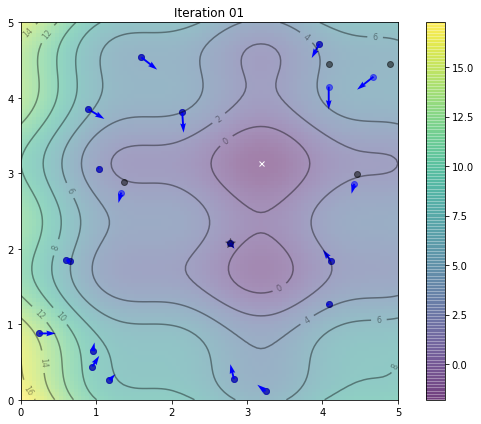

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)

 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

In [ ]:
import random
import numpy as np 

#function that models the problem


#Some variables to calculate the velocity
W = 0.5
c1 = 0.5
c2 = 0.9
target = 1

n_iterations = 20
target_error = 1e-6
n_particles = 20


particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random(), (-1)**(bool(random.getrandbits(1))) * random.random()*50]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = Rastrigin(particle_position_vector[i])
        print(fitness_cadidate, ' ', particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]

    if(abs(gbest_fitness_value - target) < target_error):
        break
    
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position

    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number ", iteration)

445.070204782662   [ 0.19032039 20.8940512 ]
2031.9957366162284   [ 0.0594218  45.06173855]
24.58558392269319   [ 0.42648503 -2.07670118]
408.69384793721036   [  0.78133889 -19.75097563]
1857.4348599739428   [ -0.63553931 -42.85559035]
1183.3102359491352   [-3.23204180e-03  3.42518706e+01]
373.2801614147384   [-0.70240016 18.96196835]
40.13536277807798   [ 0.01634275 -4.48578597]
1095.2141741754026   [ 0.71585233 32.75376872]
964.7492238282284   [-0.7725596  30.69280535]
30.258011413371733   [-0.86456794  4.89348775]
27.36775627474319   [-0.63172266  3.06454305]
694.7091819797006   [ 0.58377652 25.99454192]
1849.9626689836768   [ -0.50192195 -42.54546701]
987.9781831687693   [ 0.82528995 31.21223692]
1154.29831589295   [ 0.82837356 33.65902451]
117.60675484956508   [ -0.88999656 -10.24348387]
1460.4185619464401   [ -0.77678741 -38.08156509]
467.10741726423777   [  0.70530727 -21.17497837]
218.67257001648346   [ -0.56546897 -14.07484909]
185.23764427123209   [ 0.27434908 12.72093008]
34

In [ ]:
def particle_swarm_optimization(f,population,n_iteration,xn):
  W = 0.5
  c1 = 0.5
  c2 = 0.9
  target = 1
  target_error = 1e-6
  for i in xn:
    
  particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50]) for _ in range(n_particles)])
  print(particle_position_vector)
  pbest_position = particle_position_vector
  pbest_fitness_value = np.array([float('inf') for _ in range(population)])
  gbest_fitness_value = float('inf')
  gbest_position = np.array([float('inf'), float('inf')])

  velocity_vector = ([np.array([0, 0]) for _ in range(population)])
  iteration = 0
  start_time=time.time()
  while iteration < n_iterations:
      for i in range(population):
          fitness_cadidate = f(particle_position_vector[i])
          
          if(pbest_fitness_value[i] > fitness_cadidate):
              pbest_fitness_value[i] = fitness_cadidate
              pbest_position[i] = particle_position_vector[i]

          if(gbest_fitness_value > fitness_cadidate):
              gbest_fitness_value = fitness_cadidate
              gbest_position = particle_position_vector[i]

      if(abs(gbest_fitness_value - target) < target_error):
          break
      
      for i in range(population):
          new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
          new_position = new_velocity + particle_position_vector[i]
          particle_position_vector[i] = new_position

      iteration = iteration + 1

  stop_time=time.time()
  algorythm_time=(stop_time-start_time)
  return algorythm_time,gbest_position

**Main**

In [ ]:
alg_time_1 = [[0]*5 for i in range(11)] 
alg_time_2 = [[0]*5 for i in range(11)]
alg_time_3 = [[0]*5 for i in range(11)]
best_result_1 = [[0] for i in range(11)]
mean_1 = [[0] for i in range(11)]
best_result_x1 = [[0] for i in range(11)]
best_result_2 = [[0] for i in range(11)]
mean_2 = [[0] for i in range(11)]
best_result_x2 = [[0] for i in range(11)]
best_result_3 = [[0] for i in range(11)]
mean_3 = [[0] for i in range(11)]
best_result_x3 = [[0] for i in range(11)]

iterations=20
population=10

for xi in range(11):
  xn=2**(xi+1) 
  f1_obj = [] 
  f2_obj = []
  f3_obj = []
  print(xn)
  #print(xi) 
  temp_suma=0

  for i in range(5):
    time_1 = 0
    time_2 = 0
    time_3 = 0
    x_1 = 0
    x_2 = 0
    x_3 = 0

    alg_time_1[xi][i],x_1=particle_swarm_optimization(Rastrigin,xn,iterations)
    #alg_time_2[xi][i],x_2=particle_swarm_optimization(Sphere,xn)
    #alg_time_3[xi][i],x_3=rms_prop(start_x, Rosenbrock_grad, 0.00009 , sq_grad_Rosenbrock, max_iters, rate, rho)
    if i<1:
      all_x1 = x_1
      all_x2 = x_2
      # all_x3 = x_3
    else:
      all_x1 = np.vstack((all_x1, x_1)) 
      all_x2 = np.vstack((all_x2, x_2))
      # all_x3 = np.vstack((all_x3, x_3))

    f1_obj.append(Rastrigin(x_1)) 
    f2_obj.append(Sphere(x_2))
    # f3_obj.append(Rosenbrock(x_3))



  best_result_1[xi] = min(f1_obj) 
  mean_1[xi] = mean(np.array(f1_obj)) 
  best_result_x1[xi] = all_x1[f1_obj.index(best_result_1[xi]),:] 

  best_result_2[xi] = min(f2_obj)
  mean_2[xi] = mean(np.array(f2_obj))
  best_result_x2[xi] = all_x2[f2_obj.index(best_result_2[xi]),:]

  # best_result_3[xi] = min(f3_obj)
  # mean_3[xi] = mean(np.array(f3_obj))
  # best_result_x3[xi] = all_x3[f3_obj.index(best_result_3[xi]),:]



2
[[ 19.75108665 -23.60778721]
 [-19.78207392 -35.25291007]
 [ 29.04294065   9.8589037 ]
 [  5.71950584  46.80511332]
 [ 43.00726743   9.4481709 ]
 [-33.75985426 -40.11199635]
 [  9.44894549  13.30252867]
 [-36.50029918  11.08900114]
 [-49.60030321   6.24848389]
 [  0.20300808  12.28604507]
 [-27.74968778  -2.82940851]
 [-37.33525368 -33.51575833]
 [-36.05228176 -48.9647429 ]
 [ 41.9407195  -20.05056083]
 [-30.10493249 -29.57105899]
 [ 19.9116874  -41.60414978]
 [-22.27655766  36.54274548]
 [  3.98669996  45.74941789]
 [-47.69817726  -9.73560927]
 [-35.46492206   3.43425972]
 [ 23.56531431  30.35786925]
 [ 17.10952041 -48.53024993]
 [-26.09711187  -5.15424152]
 [ 31.23301843  23.55470695]
 [ 30.51345492   5.38006762]
 [ 49.83681008  36.39009875]
 [ 29.81731723  33.07553019]
 [-14.06391781  47.43344144]
 [-16.60354839  16.20188589]
 [ 29.62812544 -14.47933548]
 [-20.76830842  14.28022139]
 [ 42.44473339 -32.25482989]
 [ -8.97679454  20.94394498]
 [-33.7701689   -6.86440127]
 [-18.114191

TypeError: ignored

**Results draw**

In [ ]:
def particle_swarm_draw(fun_grad, fun, resolution, precision, sq_grad_val, max_iters, rate , rho):

  cur_x = np.random.uniform(0,1,2)
  iters = 0 
  previous_step_size =[0.5]
  sq_grad = [0.5]
  eps = 1e-10 

  sq_grad_avg = np.array([0.0 for _ in range(len(cur_x))])
  sq_grad_avg_sqrt = np.zeros(len(cur_x))

  X = np.linspace(-5, 5, 1000)    
  Y = np.linspace(-5, 5, 1000)    

  X, Y = np.meshgrid(X, Y)

  Z = fun(X, Y)
  Z = np.array(Z)
  Z = Z.reshape((len(X), len(Y)))

  plt.contour(X,Y,Z, resolution)

  while max(sq_grad) > sq_grad_val and max(previous_step_size) > precision and iters < max_iters:
      plt.scatter(cur_x[0], cur_x[1])
      prev_x = cur_x 
      sq_grad = fun_grad(prev_x)**2
      sq_grad_avg = (sq_grad_avg * rho) + (1 - rho) * sq_grad
      for i in range(len(sq_grad_avg)):
        sq_grad_avg_sqrt[i] = math.sqrt(sq_grad_avg[i])
      alpha = rate / (sq_grad_avg_sqrt+eps)
      cur_x = cur_x - (alpha * fun_grad(prev_x))
      previous_step_size = abs(cur_x - prev_x) 
      iters = iters+1 

  plt.show()
  print(cur_x)

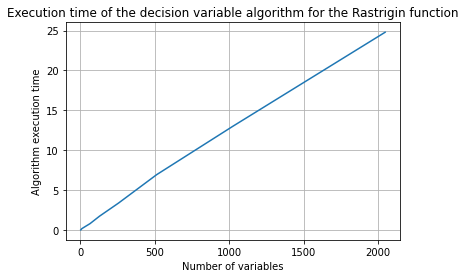

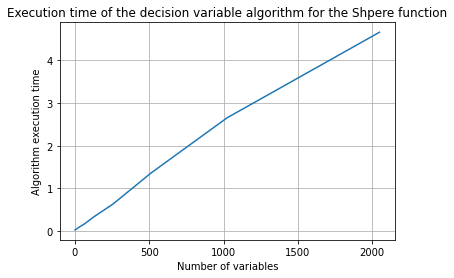

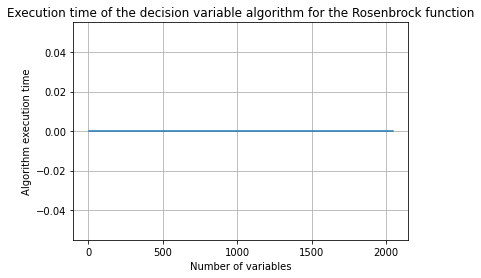

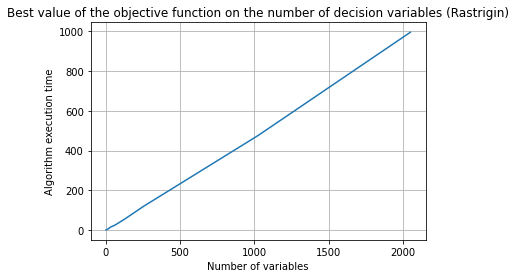

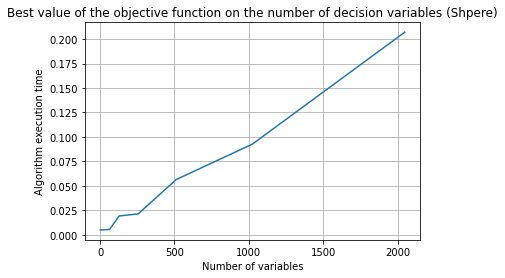

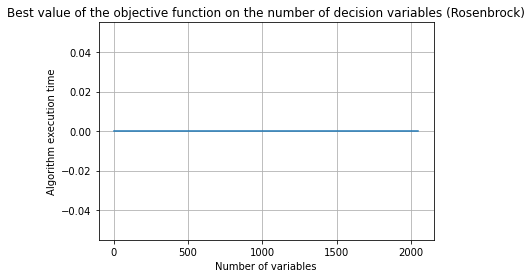

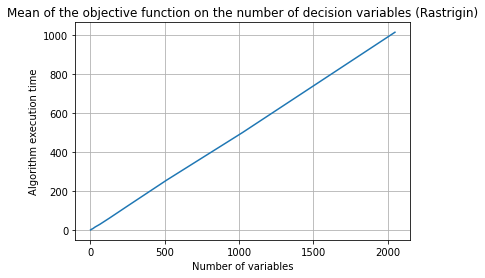

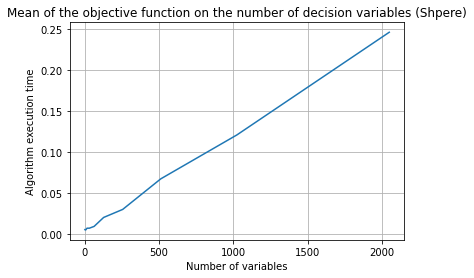

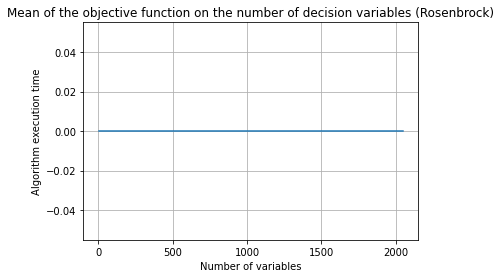

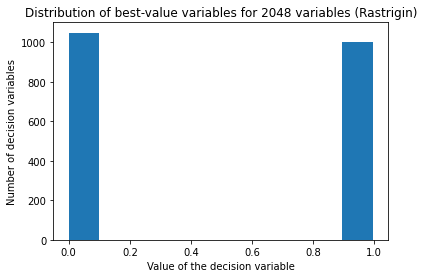

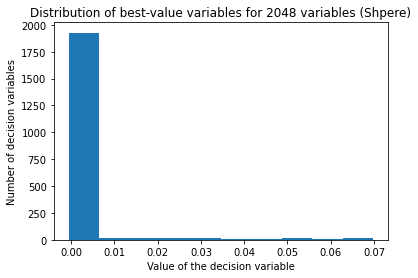

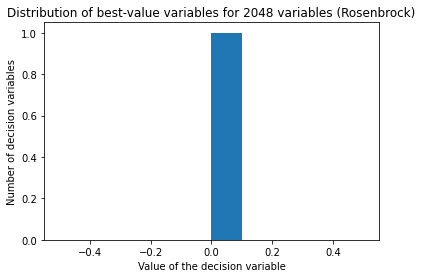

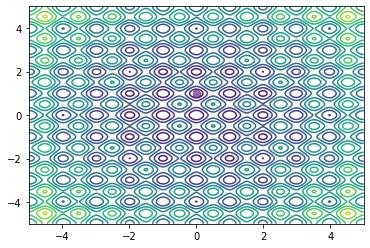

[2.71056665e-07 9.94653755e-01]


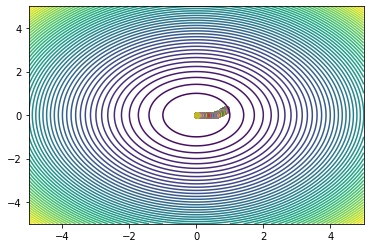

[ 1.55926386e-02 -6.97247975e-44]


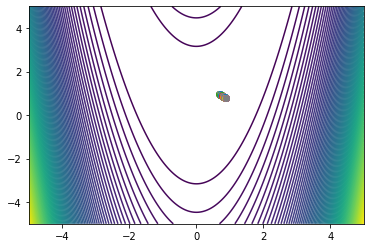

[0.8827456  0.77938253]


In [ ]:

mean_time_1=[[0] for i in range(11)]
mean_time_2=[[0] for i in range(11)]
mean_time_3=[[0] for i in range(11)]
for j in range(11):
  temp_sum_1=0
  temp_sum_2=0
  temp_sum_3=0
  for i in range(5):
    temp_sum_1=temp_sum_1+alg_time_1[j][i]
    temp_sum_2=temp_sum_2+alg_time_2[j][i]
    temp_sum_3=temp_sum_3+alg_time_3[j][i]
  mean_time_1[j]=temp_sum_1/5
  mean_time_2[j]=temp_sum_2/5
  mean_time_3[j]=temp_sum_3/5


hist1 = best_result_x1[10]
hist2 = best_result_x2[10]
hist3 = best_result_x3[10]

os_x=[[2**(i+1)] for i in range(11)]
plt.plot(os_x,mean_time_1)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rastrigin function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_2)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Shpere function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_3)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rosenbrock function')
plt.grid()
plt.show()

plt.plot(os_x,best_result_1)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_2)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_3)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.plot(os_x,mean_1)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,mean_2)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,mean_3)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.hist(hist1)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rastrigin)')
plt.show()
plt.hist(hist2)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Shpere)')
plt.show()
plt.hist(hist3)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rosenbrock)')
plt.show()
rate = 0.0005
rho = 0.99
max_iters = 5000
rms_prop_draw(Rastrigin_grad,rastrigin,10 , 0, 0.02, max_iters, rate, rho)
rms_prop_draw(Sphere_grad,sphere,50 , 0, 0.001, max_iters, rate, rho)
rms_prop_draw(Rosenbrock_grad,rosenbrock,100 , 0.00001, 0, max_iters, rate, rho)